In [ ]:
!rm -rf /content/drive


In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')


Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

# Base project folder
project_folder = '/content/drive/MyDrive/VehicleNoiseProject'

# Subfolders
folders = ['images', 'results', 'models']
for f in folders:
    os.makedirs(os.path.join(project_folder, f), exist_ok=True)

print("Project folders created in Drive!")


Project folders created in Drive!


In [3]:
# Install YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

# Install other required libraries
!pip install opencv-python-headless matplotlib pandas scikit-learn


Cloning into 'yolov5'...
remote: Enumerating objects: 17581, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 17581 (delta 40), reused 12 (delta 10), pack-reused 17510 (from 3)
Receiving objects: 100% (17581/17581), 16.70 MiB | 17.18 MiB/s, done.
Resolving deltas: 100% (12038/12038), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.2 MB/s eta 0:00:00


In [4]:
import zipfile
import os

# Path to your uploaded zip file
zip_path = '/content/drive/MyDrive/VehicleNoiseProject/images/dataset/archive.zip'
extract_path = '/content/drive/MyDrive/VehicleNoiseProject/images/dataset'

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted files
for root, dirs, files in os.walk(extract_path):
    print(f"{root} -> {files[:10]}")  # show first 10 files in each folder


/content/drive/MyDrive/VehicleNoiseProject/images/dataset -> ['archive.zip', 'SampleVideo_LowQuality.mp4', 'Sample_Video_HighQuality.mp4']
/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale -> []
/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale -> []
/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.coco -> []
/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.coco/test -> ['_annotations.coco.json', 'frame_3837_jpg.rf.7cdff66e6350318c835a7cf1b35525f0.jpg', 'frame_7929_jpg.rf.02b89050254d7e4c8c8995125a555cfe.jpg', 'frame_8097_jpg.rf.762bcc82c7b05b2ebcabc219815dca50.jpg', 'frame_6406_jpg.rf.ff63b851413c468025e0f9f2dad80fd0.jpg', 'frame_1004_jpg.rf.a6f441255e54620ea11fb3cf34fc0a97.jpg', 'frame_1806_jpg.rf.4583992e61114207bd9379b7e0652549.jpg', 'frame_0990_jpg.rf.a3223422e734a57442ee34a58d24d4b4.jpg', 'f

Sample training images: ['frame_0435_jpg.rf.2e3980e2d44f690fca901bbe71981b7a (1).jpg', 'frame_0654_jpg.rf.9b40fcdc4360454b07207360ca763154 (1).jpg', 'frame_0182_jpg.rf.24ccc1dc2e78b06ec38094471560e981 (1).jpg', 'frame_0435_jpg.rf.b64a627a937f4b21417074ddc983c184 (1).jpg', 'frame_0691_jpg.rf.5ccee83c900423ebc9201d81db329e7e (1).jpg']


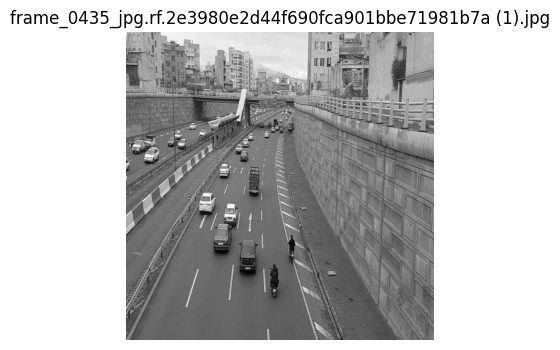

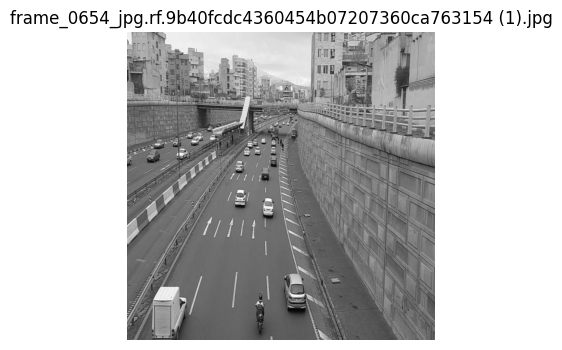

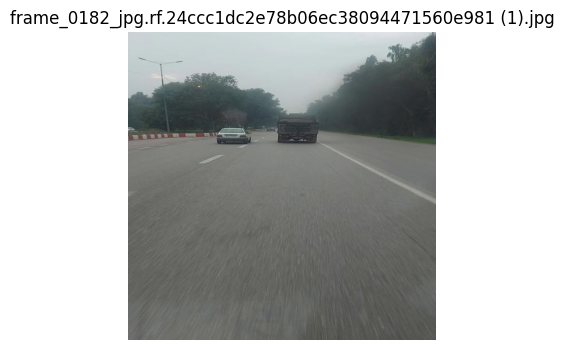

In [5]:
import cv2
from matplotlib import pyplot as plt
import os

base_path = '/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/train/images'

# List a few image files
image_files = [f for f in os.listdir(base_path) if f.endswith('.jpg')][:5]
print("Sample training images:", image_files)

# Display first 3 images
for img_file in image_files[:3]:
    img_path = os.path.join(base_path, img_file)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6,4))
    plt.imshow(img_rgb)
    plt.title(img_file)
    plt.axis('off')
    plt.show()


In [6]:
img_folder = '/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/train/images'
label_folder = '/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/train/labels'

missing_labels = []
for img_file in os.listdir(img_folder):
    if img_file.endswith('.jpg'):
        label_file = img_file.replace('.jpg', '.txt')
        if not os.path.exists(os.path.join(label_folder, label_file)):
            missing_labels.append(img_file)

print("Images missing labels:", missing_labels)



Images missing labels: []


In [7]:
empty_labels = []
for label_file in os.listdir(label_folder):
    if label_file.endswith('.txt'):
        if os.path.getsize(os.path.join(label_folder, label_file)) == 0:
            empty_labels.append(label_file)

print("Empty label files:", empty_labels)


Empty label files: ['frame_7192_jpg.rf.2cbd94f19d0ac2936a2e1652c6e9faf0.txt', 'frame_7192_jpg.rf.9c6d8e6aacab0659299ca36ba31b2b6d.txt']


In [8]:
!pip install ultralytics --upgrade


In [9]:
from ultralytics import YOLO
import os

# Path to your training dataset
train_images = '/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/train/images'
train_labels = '/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/train/labels'

# Check a few image files
print("Sample training images:", os.listdir(train_images)[:5])
print("Sample label files:", os.listdir(train_labels)[:5])


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Sample training images: ['frame_0435_jpg.rf.2e3980e2d44f690fca901bbe71981b7a (1).jpg', 'frame_0654_jpg.rf.9b40fcdc4360454b07207360ca763154 (1).jpg', 'frame_0182_jpg.rf.24ccc1dc2e78b06ec38094471560e981 (1).jpg', 'frame_0435_jpg.rf.b64a627a937f4b21417074ddc983c184 (1).jpg', 'frame_0691_jpg.rf.5ccee83c900423ebc9201d81db329e7e (1).jpg']
Sample label files: ['frame_0182_jpg.rf.24ccc1dc2e78b06ec38094471560e981 (1).txt', 'frame_0435_jpg.rf.2e3980e2d44f690fca901bbe71981b7a (1).txt', 'frame_0435_jpg.rf.b64a627a937f4b21417074ddc983c184 (1).txt', 'frame_0654_jpg.rf.a078b9fb055bd8aabc4ea0269670ec31 (1).txt', 'frame_0654_jpg.rf.9b40fcdc4360454b07207360ca763154 (1).txt']


In [10]:
import yaml

data = {
    'train': '/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/train/images',
    'val': '/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/valid/images',
    'test': '/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/images',
    'nc': 5,  # number of classes
    'names': ['car', 'bus', 'truck', 'bike', 'auto']  # class names
}

yaml_path = '/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/data.yaml'

with open(yaml_path, 'w') as f:
    yaml.dump(data, f, sort_keys=False)

print("✅ data.yaml created at:", yaml_path)


✅ data.yaml created at: /content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/data.yaml


In [11]:
import os

label_dirs = [
    '/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/train/labels',
    '/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/valid/labels'
]

for lbl_dir in label_dirs:
    for f in os.listdir(lbl_dir):
        if f.endswith('.txt') and os.path.getsize(os.path.join(lbl_dir, f)) == 0:
            print("Removing empty label file:", f)
            os.remove(os.path.join(lbl_dir, f))


Removing empty label file: frame_7192_jpg.rf.2cbd94f19d0ac2936a2e1652c6e9faf0.txt
Removing empty label file: frame_7192_jpg.rf.9c6d8e6aacab0659299ca36ba31b2b6d.txt


In [12]:
import os

labels_folder = '/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/train/labels'
invalid_files = []

for f in os.listdir(labels_folder):
    if f.endswith('.txt'):
        path = os.path.join(labels_folder, f)
        with open(path, 'r') as file:
            lines = file.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) != 5:
                    invalid_files.append(f)
                    break
                try:
                    nums = [float(p) for p in parts[1:]]
                    if not all(0 <= n <= 1 for n in nums):
                        invalid_files.append(f)
                        break
                except:
                    invalid_files.append(f)
                    break

print("Invalid label files:", invalid_files)


Invalid label files: []


In [ ]:
!ls -R "/content/drive/MyDrive/VehicleNoiseProject/images/dataset"


/content/drive/MyDrive/VehicleNoiseProject/images/dataset:
Apply_Grayscale  No_Apply_Grayscale	       SampleVideo_LowQuality.mp4
archive.zip	 Sample_Video_HighQuality.mp4

/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale:
Apply_Grayscale

/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale:
Vehicles_Detection.v9i.coco	   Vehicles_Detection.v9i.yolov8
Vehicles_Detection.v9i.tensorflow  Vehicles_Detection.v9i.yolov9

/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.coco:
test  train  valid

/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.coco/test:
_annotations.coco.json
frame_0990_jpg.rf.a3223422e734a57442ee34a58d24d4b4.jpg
frame_1004_jpg.rf.a6f441255e54620ea11fb3cf34fc0a97.jpg
frame_1018_jpg.rf.185b0b25bb53e1d0eb860dda162bb2ae.jpg
frame_1806_jpg.rf.4583992e61114207bd9379b7e0652549.jpg
frame_3837_j

In [13]:
import os
import json
from pathlib import Path

# Paths
dataset_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.coco"
splits = ["train", "valid", "test"]

# Function to convert COCO bbox to YOLO format
def coco_to_yolo(bbox, img_width, img_height):
    x, y, w, h = bbox
    x_center = (x + w / 2) / img_width
    y_center = (y + h / 2) / img_height
    w_norm = w / img_width
    h_norm = h / img_height
    return [x_center, y_center, w_norm, h_norm]

for split in splits:
    print(f"Processing {split} split...")
    images_path = os.path.join(dataset_path, split)
    labels_path = os.path.join(images_path, "labels")
    os.makedirs(labels_path, exist_ok=True)

    # Load COCO annotations
    coco_file = os.path.join(images_path, "_annotations.coco.json")
    with open(coco_file, "r") as f:
        coco = json.load(f)

    # Create a dict mapping image IDs to file names
    image_dict = {img['id']: img for img in coco['images']}

    # Process each annotation
    for ann in coco['annotations']:
        img_info = image_dict[ann['image_id']]
        img_filename = Path(img_info['file_name']).stem
        txt_file = os.path.join(labels_path, f"{img_filename}.txt")

        # Convert bbox
        yolo_bbox = coco_to_yolo(ann['bbox'], img_info['width'], img_info['height'])
        class_id = ann['category_id']  # Assuming single class or proper category mapping

        # Write to .txt (append if multiple objects in same image)
        with open(txt_file, "a") as f:
            f.write(f"{class_id} {' '.join(map(str, yolo_bbox))}\n")

    print(f"{split} split done! Labels saved in {labels_path}")


Processing train split...
train split done! Labels saved in /content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.coco/train/labels
Processing valid split...
valid split done! Labels saved in /content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.coco/valid/labels
Processing test split...
test split done! Labels saved in /content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.coco/test/labels


In [14]:
import os

# Path to your labels folder (train, valid, test)
splits = ['train', 'valid', 'test']
base_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.coco"

for split in splits:
    labels_path = os.path.join(base_path, split, 'labels')

    if not os.path.exists(labels_path):
        print(f"Labels folder not found: {labels_path}")
        continue

    for file in os.listdir(labels_path):
        if file.endswith(".txt"):
            file_path = os.path.join(labels_path, file)
            with open(file_path, "r") as f:
                lines = f.readlines()

            # Replace class_id with 0 for all lines
            new_lines = []
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 5:
                    parts[0] = '0'  # set class_id to 0
                    new_lines.append(" ".join(parts))

            # Save back
            with open(file_path, "w") as f:
                f.write("\n".join(new_lines))

    print(f"{split} split labels updated: all classes set to 0")


train split labels updated: all classes set to 0
valid split labels updated: all classes set to 0
test split labels updated: all classes set to 0


In [15]:
# Example if your dataset has train, valid, test image folders
image_folders = ["train", "valid", "test"]

dataset_path = "/content/drive/MyDrive/VehicleNoiseProject/images"


In [18]:
import os
import hashlib
from PIL import Image

# Path to YOLOv8 dataset
dataset_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8"
splits = ["train", "valid", "test"]

def file_hash(filepath):
    """Generate hash of a file to detect duplicates"""
    with open(filepath, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

def is_corrupted(image_path):
    """Check if image is corrupted"""
    try:
        img = Image.open(image_path)
        img.verify()
        return False
    except:
        return True

for split in splits:
    img_dir = os.path.join(dataset_path, split, "images")
    lbl_dir = os.path.join(dataset_path, split, "labels")

    print(f"\n=== Checking {split.upper()} ===")

    if not os.path.exists(img_dir) or not os.path.exists(lbl_dir):
        print(f"Skipping {split}, folder missing.")
        continue

    images = [f for f in os.listdir(img_dir) if f.endswith((".jpg", ".png", ".jpeg"))]
    labels = [f for f in os.listdir(lbl_dir) if f.endswith(".txt")]

    image_stems = {os.path.splitext(f)[0] for f in images}
    label_stems = {os.path.splitext(f)[0] for f in labels}

    # Delete extra labels
    for lbl in (label_stems - image_stems):
        file_path = os.path.join(lbl_dir, lbl + ".txt")
        os.remove(file_path)
        print(f"Deleted extra label: {file_path}")

    # Delete extra images
    for img in (image_stems - label_stems):
        for ext in [".jpg", ".png", ".jpeg"]:
            file_path = os.path.join(img_dir, img + ext)
            if os.path.exists(file_path):
                os.remove(file_path)
                print(f"Deleted extra image: {file_path}")

    # Check and delete corrupted images
    for f in list(images):  # list() avoids modifying while iterating
        path = os.path.join(img_dir, f)
        if is_corrupted(path):
            os.remove(path)
            print(f"Deleted corrupt image: {path}")

    # Detect duplicate images
    seen_hashes = {}
    for f in os.listdir(img_dir):
        if not f.endswith((".jpg", ".png", ".jpeg")):
            continue
        path = os.path.join(img_dir, f)
        h = file_hash(path)
        if h in seen_hashes:
            os.remove(path)
            print(f"Deleted duplicate image: {path}")
        else:
            seen_hashes[h] = path

    # Detect duplicate labels
    seen_hashes = {}
    for f in os.listdir(lbl_dir):
        if not f.endswith(".txt"):
            continue
        path = os.path.join(lbl_dir, f)
        h = file_hash(path)
        if h in seen_hashes:
            os.remove(path)
            print(f"Deleted duplicate label: {path}")
        else:
            seen_hashes[h] = path

    # Final summary
    images = [f for f in os.listdir(img_dir) if f.endswith((".jpg", ".png", ".jpeg"))]
    labels = [f for f in os.listdir(lbl_dir) if f.endswith(".txt")]
    print(f"Final count -> Images: {len(images)}, Labels: {len(labels)}")



=== Checking TRAIN ===
Deleted duplicate image: /content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/train/images/frame_1015_jpg.rf.b606346aeeac2ffe72fc0f1d9a954a7f.jpg
Deleted duplicate image: /content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/train/images/frame_1016_jpg.rf.b9ff82f84b1b2b26f412bfd05832ee76.jpg
Deleted duplicate image: /content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/train/images/frame_1020_jpg.rf.3544b699f69cedf74a5409a0475fd6ec.jpg
Deleted duplicate image: /content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/train/images/frame_1021_jpg.rf.7e72cd7ed74974dd0921ff9171494662.jpg
Deleted duplicate image: /content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_

In [19]:
# Check and delete corrupted images
for f in list(images):  # list() avoids modifying while iterating
    path = os.path.join(img_dir, f)
    if os.path.exists(path) and is_corrupted(path):
        os.remove(path)
        print(f"Deleted corrupt image: {path}")


In [20]:
import os
import hashlib
from PIL import Image

# Folder where your images are stored
img_dir = "/content/drive/MyDrive/VehicleNoiseProject/images"

def get_hash(image_path):
    """Return hash of an image (ignores metadata)."""
    try:
        with Image.open(image_path) as img:
            img = img.convert("RGB")  # normalize mode
            return hashlib.md5(img.tobytes()).hexdigest()
    except:
        return None

# Store hashes and paths
hashes = {}
duplicates = []

for root, _, files in os.walk(img_dir):
    for f in files:
        path = os.path.join(root, f)
        h = get_hash(path)
        if h:
            if h in hashes:
                duplicates.append(path)  # mark as duplicate
            else:
                hashes[h] = path

# Print duplicates found
if duplicates:
    print("Duplicate images found:")
    for d in duplicates:
        print(d)
else:
    print("No duplicates found.")

# Optional: delete duplicates automatically
# for d in duplicates:
#     os.remove(d)
#     print(f"Deleted duplicate: {d}")


Duplicate images found:
/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.tensorflow/test/frame_0990_jpg.rf.a3223422e734a57442ee34a58d24d4b4.jpg
/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.tensorflow/test/frame_1806_jpg.rf.4583992e61114207bd9379b7e0652549.jpg
/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.tensorflow/test/frame_1018_jpg.rf.185b0b25bb53e1d0eb860dda162bb2ae.jpg
/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.tensorflow/test/frame_3837_jpg.rf.7cdff66e6350318c835a7cf1b35525f0.jpg
/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.tensorflow/test/frame_1004_jpg.rf.a6f441255e54620ea11fb3cf34fc0a97.jpg
/content/drive/MyDrive/VehicleNoiseProject/images/datase

In [21]:
import os

labels_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/labels"

# Map old class IDs to new ones (adjust if needed)
# Example: {old_id: new_id}
class_mapping = {
    0: 0,
    1: 1,
    2: 2,
    3: 3,
    4: 4
}

for label_file in os.listdir(labels_path):
    if label_file.endswith(".txt"):
        file_path = os.path.join(labels_path, label_file)
        with open(file_path, "r") as f:
            lines = f.readlines()

        new_lines = []
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            if class_id in class_mapping:
                parts[0] = str(class_mapping[class_id])
                new_lines.append(" ".join(parts))

        with open(file_path, "w") as f:
            f.write("\n".join(new_lines))

print("Step 4 complete: Labels updated for 5 classes.")


Step 4 complete: Labels updated for 5 classes.


In [22]:
import os
import shutil
import random

# Paths
dataset_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset"
labels_path = os.path.join(dataset_path, "labels")

# Train/val split ratio
split_ratio = 0.8

# Create YOLOv8 folder structure
train_images = os.path.join(dataset_path, "images/train")
val_images = os.path.join(dataset_path, "images/val")
train_labels = os.path.join(dataset_path, "labels/train")
val_labels = os.path.join(dataset_path, "labels/val")

for folder in [train_images, val_images, train_labels, val_labels]:
    os.makedirs(folder, exist_ok=True)

# Recursively get all images
all_images = []
for root, dirs, files in os.walk(dataset_path):
    # Skip YOLO folders to avoid copying twice
    if any(skip in root for skip in ["images/train", "images/val", "labels"]):
        continue
    for file in files:
        if file.endswith((".jpg", ".png", ".jpeg")):
            all_images.append(os.path.join(root, file))

# Shuffle images
random.shuffle(all_images)

# Split
train_count = int(len(all_images) * split_ratio)
train_files = all_images[:train_count]
val_files = all_images[train_count:]

# Function to move images and labels
def move_files(file_list, img_dest, label_dest):
    for img_file in file_list:
        # Move image
        shutil.copy(img_file, img_dest)

        # Move label
        img_name = os.path.splitext(os.path.basename(img_file))[0]
        label_file = os.path.join(labels_path, img_name + ".txt")
        if os.path.exists(label_file):
            shutil.copy(label_file, label_dest)

# Move train and val
move_files(train_files, train_images, train_labels)
move_files(val_files, val_images, val_labels)

print("Dataset split into train and val successfully!")
print(f"Train images: {len(train_files)}, Val images: {len(val_files)}")


Dataset split into train and val successfully!
Train images: 1022, Val images: 256


In [23]:
base_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8"

train_count = len(os.listdir(os.path.join(base_path, 'train/images')))
val_count = len(os.listdir(os.path.join(base_path, 'valid/images')))
test_count = len(os.listdir(os.path.join(base_path, 'test/images')))

print("Total train images:", train_count)
print("Total val images:", val_count)
print("Total test images:", test_count)


Total train images: 134
Total val images: 28
Total test images: 13


In [24]:
import os
import shutil

# Set paths for images and labels
dataset_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset"

splits = ["train", "val", "test"]

for split in splits:
    image_dir = os.path.join(dataset_path, "images", split)
    label_dir = os.path.join(dataset_path, "labels", split)

    # Create label folder if not exists
    os.makedirs(label_dir, exist_ok=True)

    # Flatten images
    for root, _, files in os.walk(image_dir):
        for file in files:
            if file.endswith((".jpg", ".png")):
                src = os.path.join(root, file)
                dst = os.path.join(image_dir, file)
                if src != dst:
                    shutil.move(src, dst)

    # Flatten labels
    label_root = os.path.join(dataset_path, "labels", split)
    for root, _, files in os.walk(label_root):
        for file in files:
            if file.endswith(".txt"):
                src = os.path.join(root, file)
                dst = os.path.join(label_dir, file)
                if src != dst:
                    shutil.move(src, dst)

    # Remove empty subfolders
    for root, dirs, _ in os.walk(image_dir, topdown=False):
        for d in dirs:
            folder_path = os.path.join(root, d)
            if not os.listdir(folder_path):
                os.rmdir(folder_path)

    for root, dirs, _ in os.walk(label_dir, topdown=False):
        for d in dirs:
            folder_path = os.path.join(root, d)
            if not os.listdir(folder_path):
                os.rmdir(folder_path)

print("Flattening complete! ✅")


Flattening complete! ✅


In [25]:
import os

# Path to your dataset root folder
dataset_path = "/content/drive/MyDrive/VehicleNoiseProject"

splits = ["train", "val", "test"]

for split in splits:
    img_dir = os.path.join(dataset_path, split, "images")
    lbl_dir = os.path.join(dataset_path, split, "labels")

    if not os.path.exists(img_dir):
        print(f"{img_dir} not found!")
        continue

    if not os.path.exists(lbl_dir):
        os.makedirs(lbl_dir)

    images = [f for f in os.listdir(img_dir) if f.endswith((".jpg", ".png", ".jpeg"))]
    labels = [f for f in os.listdir(lbl_dir) if f.endswith(".txt")]

    image_bases = [os.path.splitext(f)[0] for f in images]
    label_bases = [os.path.splitext(f)[0] for f in labels]

    missing_labels = [f for f in image_bases if f not in label_bases]

    for f in missing_labels:
        open(os.path.join(lbl_dir, f + ".txt"), "w").close()

    print(f"{split.upper()}: {len(images)} images, {len(labels)+len(missing_labels)} labels")
    print(f"  Added {len(missing_labels)} missing label files.\n")


/content/drive/MyDrive/VehicleNoiseProject/train/images not found!
/content/drive/MyDrive/VehicleNoiseProject/val/images not found!
/content/drive/MyDrive/VehicleNoiseProject/test/images not found!


In [ ]:
import os

root_path = '/content/drive/MyDrive/VehicleNoiseProject'  # change to your folder

for root, dirs, files in os.walk(root_path):
    level = root.replace(root_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")


VehicleNoiseProject/
    images/
        dataset/
            Apply_Grayscale/
                Apply_Grayscale/
                    Vehicles_Detection.v9i.coco/
                        test/
                            labels/
                        train/
                            labels/
                        valid/
                            labels/
                    Vehicles_Detection.v9i.tensorflow/
                        test/
                        train/
                        valid/
                    Vehicles_Detection.v9i.yolov8/
                        test/
                            images/
                            labels/
                        train/
                            images/
                            labels/
                        valid/
                            images/
                            labels/
                    Vehicles_Detection.v9i.yolov9/
                        test/
                            images/
                

In [ ]:
# List all directories recursively
!find /content/drive/MyDrive/VehicleNoiseProject -type d

# Or tree view (install tree first if needed)
!sudo apt-get install -y tree
!tree -d /content/drive/MyDrive/VehicleNoiseProject


/content/drive/MyDrive/VehicleNoiseProject
/content/drive/MyDrive/VehicleNoiseProject/images
/content/drive/MyDrive/VehicleNoiseProject/images/dataset
/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale
/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale
/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.coco
/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.coco/test
/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.coco/test/labels
/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.coco/train
/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.coco/train/labels
/content/drive/MyDrive/VehicleNoiseProject/images/dataset/A

In [26]:
# Path to your data.yaml
yaml_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/data.yaml"

# Define the updated YAML content
yaml_content = """
train: /content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/train/images
val: /content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/valid/images
test: /content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/images

nc: 5
names: ['car', 'bus', 'truck', 'bike', 'auto']
"""

# Write the YAML content to the file
with open(yaml_path, "w") as f:
    f.write(yaml_content)

print("data.yaml updated successfully!")


data.yaml updated successfully!


In [30]:
import os

# Paths for YOLOv8 dataset
train_img_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/train/images"
train_lbl_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/train/labels"

val_img_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/valid/images"
val_lbl_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/valid/labels"

test_img_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/images"
test_lbl_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/labels"

# Function to check counts
def check_folder(img_path, lbl_path, split_name):
    num_imgs = len([f for f in os.listdir(img_path) if f.endswith((".jpg", ".png", ".jpeg"))])
    num_lbls = len([f for f in os.listdir(lbl_path) if f.endswith(".txt")])
    print(f"{split_name} - Images: {num_imgs}, Labels: {num_lbls}")

# Check all splits
check_folder(train_img_path, train_lbl_path, "TRAIN")
check_folder(val_img_path, val_lbl_path, "VAL")
check_folder(test_img_path, test_lbl_path, "TEST")


TRAIN - Images: 134, Labels: 101
VAL - Images: 28, Labels: 28
TEST - Images: 13, Labels: 13


In [31]:
import os

# Paths
test_img_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/images"
test_lbl_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/labels"

# Get file names without extension
images = {os.path.splitext(f)[0] for f in os.listdir(test_img_path) if f.endswith(('.jpg', '.png', '.jpeg'))}
labels = {os.path.splitext(f)[0] for f in os.listdir(test_lbl_path) if f.endswith('.txt')}

# Find mismatches
extra_labels = labels - images
missing_labels = images - labels

print("Extra labels:", extra_labels)
print("Images without labels:", missing_labels)

# Delete extra label files
for lbl in extra_labels:
    path = os.path.join(test_lbl_path, lbl + ".txt")
    if os.path.exists(path):
        os.remove(path)
        print("Deleted:", path)

print("✅ Cleanup complete")


Extra labels: set()
Images without labels: set()
✅ Cleanup complete


In [32]:
train_imgs = set(f.split(".")[0] for f in os.listdir(train_img_path))
train_lbls = set(f.split(".")[0] for f in os.listdir(train_lbl_path))

missing_labels = train_imgs - train_lbls
extra_labels = train_lbls - train_imgs

print("TRAIN - Missing labels for images:", missing_labels)
print("TRAIN - Labels without images:", extra_labels)


TRAIN - Missing labels for images: set()
TRAIN - Labels without images: set()


In [33]:
import os

dataset_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8"

splits = ["train", "valid", "test"]  # use 'valid' instead of 'val'

for split in splits:
    img_dir = os.path.join(dataset_path, split, "images")
    lbl_dir = os.path.join(dataset_path, split, "labels")

    img_files = set(f.split(".")[0] for f in os.listdir(img_dir))
    lbl_files = set(f.split(".")[0] for f in os.listdir(lbl_dir))

    missing_labels = img_files - lbl_files
    missing_images = lbl_files - img_files

    print(f"\n{split.upper()} - Missing labels for images: {missing_labels}")
    print(f"{split.upper()} - Labels without images: {missing_images}")



TRAIN - Missing labels for images: set()
TRAIN - Labels without images: set()

VALID - Missing labels for images: set()
VALID - Labels without images: set()

TEST - Missing labels for images: set()
TEST - Labels without images: set()


In [35]:
import os

splits = ["train", "valid", "test"]
dataset_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8"

for split in splits:
    img_dir = os.path.join(dataset_path, split, "images")
    lbl_dir = os.path.join(dataset_path, split, "labels")
    os.makedirs(lbl_dir, exist_ok=True)

    images = {os.path.splitext(f)[0] for f in os.listdir(img_dir) if f.endswith(('.jpg','.png','.jpeg'))}
    labels = {os.path.splitext(f)[0] for f in os.listdir(lbl_dir) if f.endswith('.txt')}

    # Create empty labels for missing ones
    for img in images - labels:
        open(os.path.join(lbl_dir, img + ".txt"), "w").close()
        print(f"Created empty label for {img}.jpg")

    # Remove labels without images
    for lbl in labels - images:
        os.remove(os.path.join(lbl_dir, lbl + ".txt"))
        print(f"Deleted orphan label: {lbl}.txt")

print("✅ All splits fixed. Now image-label counts match.")


Created empty label for frame_3134_jpg.rf.4ae91b5de3e6a6b0eb64e5f1373751ab (1).jpg
Created empty label for frame_9130_jpg.rf.a1b0f5fbb5200a42349439d198583e07.jpg
Created empty label for frame_7577_jpg.rf.b839378e81a8d1a875a722718f1105b4.jpg
Created empty label for frame_8305_jpg.rf.2a4a7cf2ee22258aec4da5cbbe8336c4.jpg
Created empty label for frame_1506_jpg.rf.8cdc70857764dbef2f1df557002b50a3 (1).jpg
Created empty label for frame_2786_jpg.rf.e5798b7bca539e34a3dc9731b71d0819 (1).jpg
Created empty label for frame_4426_jpg.rf.b012e820ab7f08caca56ff32d8dd8d1d.jpg
Created empty label for frame_0691_jpg.rf.62a645636a577b7dfeb36e12fbba2070 (1).jpg
Created empty label for frame_4298_jpg.rf.52289a1037d7bcb7b5e486dba4d783f1.jpg
Created empty label for frame_4219_jpg.rf.4dde1cb4547756565c65b54917f9c226.jpg
Created empty label for frame_9536_jpg.rf.d2bb18a48d15dccf9e8ef762e133706a.jpg
Created empty label for frame_3893_jpg.rf.ba61ae77337506b5797a9d3c63715c3f.jpg
Created empty label for frame_0654_j

In [36]:
import os
from collections import Counter

# dataset paths
base_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8"
splits = ["train", "valid", "test"]

for split in splits:
    labels_dir = os.path.join(base_path, split, "labels")
    images_dir = os.path.join(base_path, split, "images")

    # Initialize counters
    class_counts = Counter()
    label_file_count = 0

    # Count objects per class
    if os.path.exists(labels_dir):
        for lbl_file in os.listdir(labels_dir):
            if lbl_file.endswith(".txt"):
                label_file_count += 1  # each label corresponds to one image
                with open(os.path.join(labels_dir, lbl_file), "r") as f:
                    for line in f:
                        cls_id = int(line.split()[0])  # class id is first element
                        class_counts[cls_id] += 1

    # Count images
    total_images = len([f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

    # Print results
    print(f"\n===== {split.upper()} DATA =====")
    print("Total images in folder:", total_images)
    print("Total label files:", label_file_count)
    print("Object counts per class:")
    for cls_id, count in class_counts.items():
        print(f"  Class {cls_id}: {count} objects")



===== TRAIN DATA =====
Total images in folder: 134
Total label files: 134
Object counts per class:
  Class 1: 1527 objects
  Class 4: 47 objects
  Class 2: 281 objects
  Class 3: 190 objects
  Class 0: 24 objects

===== VALID DATA =====
Total images in folder: 28
Total label files: 28
Object counts per class:
  Class 2: 92 objects
  Class 1: 398 objects
  Class 3: 59 objects
  Class 0: 6 objects
  Class 4: 8 objects

===== TEST DATA =====
Total images in folder: 13
Total label files: 13
Object counts per class:
  Class 1: 179 objects
  Class 3: 29 objects
  Class 2: 38 objects
  Class 0: 5 objects
  Class 4: 3 objects


In [37]:
# Install YOLOv8 if not installed
!pip install ultralytics --quiet

from ultralytics import YOLO

# Path to your YAML file
yaml_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/data.yaml"

# Choose model: yolov8n.pt (nano, fast, good for small datasets)
model = YOLO("yolov8n.pt")

# Start training
results = model.train(
    data=yaml_path,
    epochs=50,              # You can increase if GPU allows
    batch=16,               # Adjust based on GPU memory
    imgsz=640,              # Image size
    workers=2,
    project="VehicleDetection",
    name="yolov8_training",
    exist_ok=True,          # Overwrite if folder exists
    augment=True            # Enable augmentation to improve small dataset
)

# Evaluate model on validation/test after training
metrics = model.val()


Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_training, nbs=64, nms=False, ops

In [ ]:
import shutil

# Source paths
last_pt = "/content/yolov5/VehicleDetection/yolov8_training/weights/last.pt"
best_pt = "/content/yolov5/VehicleDetection/yolov8_training/weights/best.pt"

# Destination paths in your Drive
dst_folder = "/content/drive/MyDrive/VehicleNoiseProject/weights"
shutil.copy(last_pt, dst_folder)
shutil.copy(best_pt, dst_folder)


'/content/drive/MyDrive/VehicleNoiseProject/weights'

In [38]:
!ls /content/yolov5/VehicleDetection/yolov8_training/weights


best.pt  last.pt


In [39]:
# Rename the existing file (just in case you want to keep it)
!mv /content/drive/MyDrive/VehicleNoiseProject/weights /content/drive/MyDrive/VehicleNoiseProject/weights_old


mv: cannot overwrite non-directory '/content/drive/MyDrive/VehicleNoiseProject/weights_old' with directory '/content/drive/MyDrive/VehicleNoiseProject/weights'


In [40]:
!mkdir /content/drive/MyDrive/VehicleNoiseProject/weights


mkdir: cannot create directory ‘/content/drive/MyDrive/VehicleNoiseProject/weights’: File exists


In [41]:
!cp /content/yolov5/VehicleDetection/yolov8_training/weights/best.pt /content/drive/MyDrive/VehicleNoiseProject/weights/
!cp /content/yolov5/VehicleDetection/yolov8_training/weights/last.pt /content/drive/MyDrive/VehicleNoiseProject/weights/


In [45]:
folder = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/images"

for f in os.listdir(folder):
    if "1004" in f:  # search for your frame number
        print(f)


frame_1004_jpg.rf.a6f441255e54620ea11fb3cf34fc0a97 (1).jpg


Using: /content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/images/frame_1004_jpg.rf.a6f441255e54620ea11fb3cf34fc0a97 (1).jpg

image 1/1 /content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/images/frame_1004_jpg.rf.a6f441255e54620ea11fb3cf34fc0a97 (1).jpg: 640x640 1 car, 13 buss, 10 trucks, 2 bikes, 85.2ms
Speed: 2.4ms preprocess, 85.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


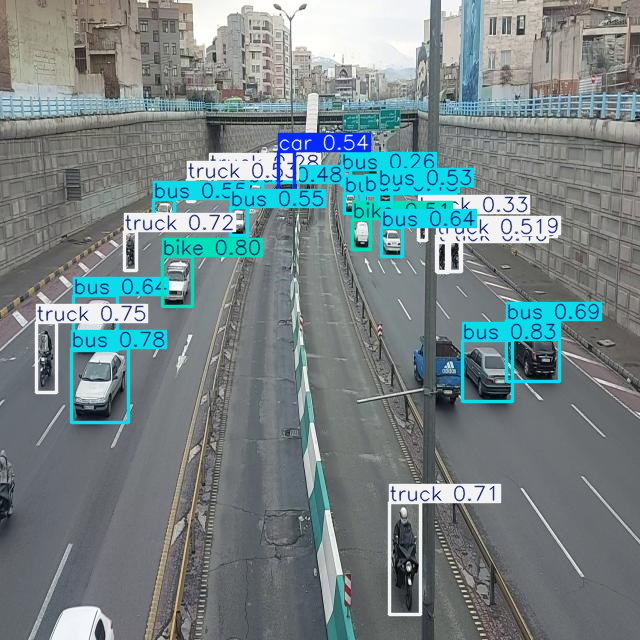

In [46]:
import os

folder = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/images"

# Search for any file containing "1004"
for f in os.listdir(folder):
    if "1004" in f:
        img_path = os.path.join(folder, f)
        print("Using:", img_path)
        results = model.predict(img_path)
        results[0].show()
        break


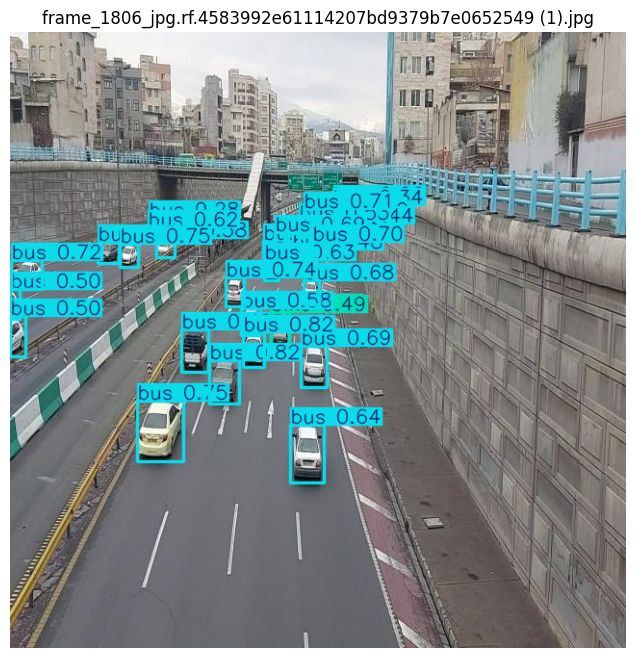

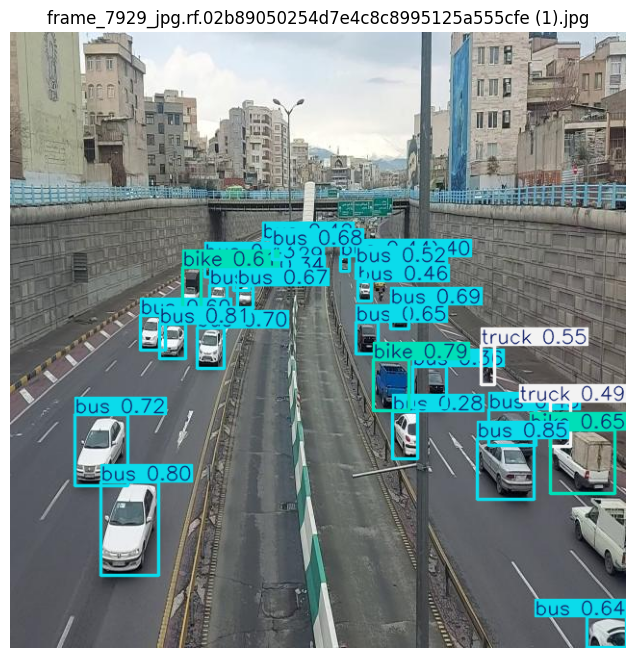

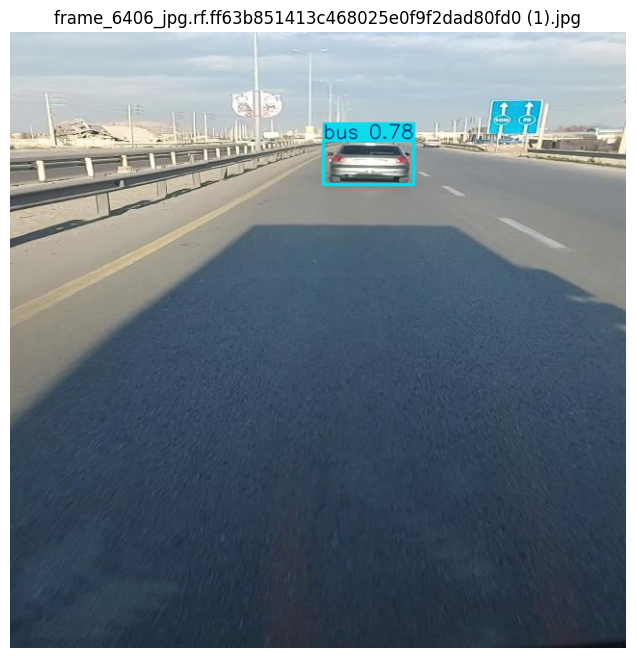

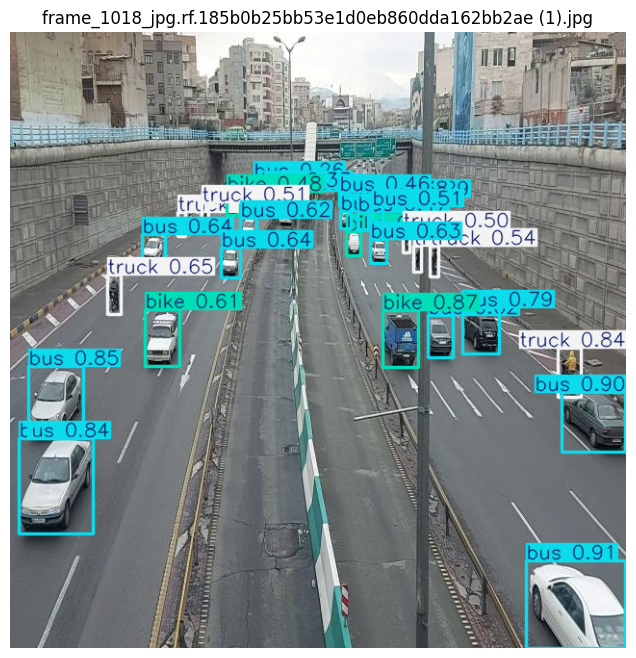

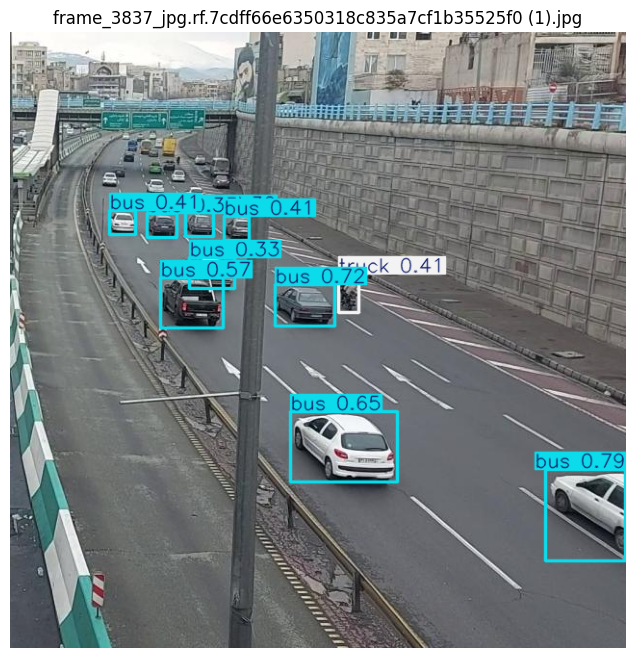

In [47]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Load the trained model
weights_path = "/content/drive/MyDrive/VehicleNoiseProject/weights/best.pt"
model = YOLO(weights_path)

# Path to your test images
test_img_dir = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/images"
test_images = os.listdir(test_img_dir)

# Show predictions on first 5 test images
for img_file in test_images[:5]:
    img_path = os.path.join(test_img_dir, img_file)
    results = model.predict(img_path, verbose=False)  # Run prediction
    annotated_frame = results[0].plot()  # Get annotated image

    # Convert to RGB for matplotlib
    annotated_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

    # Display
    plt.figure(figsize=(8, 8))
    plt.title(img_file)
    plt.imshow(annotated_frame)
    plt.axis("off")
    plt.show()


In [48]:
from ultralytics import YOLO
import os
import pandas as pd

# Load your trained model
weights_path = "/content/drive/MyDrive/VehicleNoiseProject/weights/best.pt"
model = YOLO(weights_path)

# Folder containing test images
test_img_folder = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/images"

# Prepare output
vehicle_counts = []

# Loop through test images
for img_file in os.listdir(test_img_folder):
    img_path = os.path.join(test_img_folder, img_file)

    results = model.predict(img_path, verbose=False)  # Run inference
    num_vehicles = len(results[0].boxes)             # Count all boxes as vehicles

    print(f"{img_file}: {num_vehicles} vehicles detected")
    vehicle_counts.append({"image": img_file, "vehicles": num_vehicles})

# Save results to CSV
df = pd.DataFrame(vehicle_counts)
df.to_csv("/content/drive/MyDrive/VehicleNoiseProject/vehicle_counts.csv", index=False)



frame_1806_jpg.rf.4583992e61114207bd9379b7e0652549 (1).jpg: 31 vehicles detected
frame_7929_jpg.rf.02b89050254d7e4c8c8995125a555cfe (1).jpg: 28 vehicles detected
frame_6406_jpg.rf.ff63b851413c468025e0f9f2dad80fd0 (1).jpg: 1 vehicles detected
frame_1018_jpg.rf.185b0b25bb53e1d0eb860dda162bb2ae (1).jpg: 30 vehicles detected
frame_3837_jpg.rf.7cdff66e6350318c835a7cf1b35525f0 (1).jpg: 10 vehicles detected
frame_1004_jpg.rf.a6f441255e54620ea11fb3cf34fc0a97 (1).jpg: 21 vehicles detected
frame_7020_jpg.rf.2253566dc05fca6e0181a517bab14339 (1).jpg: 6 vehicles detected
frame_4363_jpg.rf.1b2237d870de9cc7618a46bf229d23ed (1).jpg: 2 vehicles detected
frame_0990_jpg.rf.a3223422e734a57442ee34a58d24d4b4 (1).jpg: 17 vehicles detected
frame_8097_jpg.rf.762bcc82c7b05b2ebcabc219815dca50 (1).jpg: 26 vehicles detected
frame_9106_jpg.rf.edaac933241f83e08bf00984c0e0c85f (1).jpg: 2 vehicles detected
frame_9055_jpg.rf.067db6b83a7de9859840f6ca2484d373 (1).jpg: 30 vehicles detected
frame_9486_jpg.rf.2280c498ddc723

In [49]:
def rate_noise(vehicle_count):
    if vehicle_count <= 5:
        return "Low"
    elif vehicle_count <= 15:
        return "Medium"
    else:
        return "High"


In [50]:
vehicle_counts = []

for img_file in os.listdir(test_img_folder):
    img_path = os.path.join(test_img_folder, img_file)

    results = model.predict(img_path, verbose=False)  # Run inference
    num_vehicles = len(results[0].boxes)             # Count all boxes as vehicles

    noise_level = rate_noise(num_vehicles)           # Assign noise level

    print(f"{img_file}: {num_vehicles} vehicles detected → Noise level: {noise_level}")

    vehicle_counts.append({
        "image": img_file,
        "vehicles": num_vehicles,
        "noise_level": noise_level
    })

# Save results to CSV
df = pd.DataFrame(vehicle_counts)
df.to_csv("/content/drive/MyDrive/VehicleNoiseProject/vehicle_counts_with_noise.csv", index=False)


frame_1806_jpg.rf.4583992e61114207bd9379b7e0652549 (1).jpg: 31 vehicles detected → Noise level: High
frame_7929_jpg.rf.02b89050254d7e4c8c8995125a555cfe (1).jpg: 28 vehicles detected → Noise level: High
frame_6406_jpg.rf.ff63b851413c468025e0f9f2dad80fd0 (1).jpg: 1 vehicles detected → Noise level: Low
frame_1018_jpg.rf.185b0b25bb53e1d0eb860dda162bb2ae (1).jpg: 30 vehicles detected → Noise level: High
frame_3837_jpg.rf.7cdff66e6350318c835a7cf1b35525f0 (1).jpg: 10 vehicles detected → Noise level: Medium
frame_1004_jpg.rf.a6f441255e54620ea11fb3cf34fc0a97 (1).jpg: 21 vehicles detected → Noise level: High
frame_7020_jpg.rf.2253566dc05fca6e0181a517bab14339 (1).jpg: 6 vehicles detected → Noise level: Medium
frame_4363_jpg.rf.1b2237d870de9cc7618a46bf229d23ed (1).jpg: 2 vehicles detected → Noise level: Low
frame_0990_jpg.rf.a3223422e734a57442ee34a58d24d4b4 (1).jpg: 17 vehicles detected → Noise level: High
frame_8097_jpg.rf.762bcc82c7b05b2ebcabc219815dca50 (1).jpg: 26 vehicles detected → Noise lev

In [51]:
import pandas as pd

vehicle_counts = []

for img_file in os.listdir(test_img_folder):
    img_path = os.path.join(test_img_folder, img_file)
    results = model.predict(img_path, verbose=False)
    num_vehicles = len(results[0].boxes)
    noise_level = rate_noise(num_vehicles)
    vehicle_counts.append({
        "image": img_file,
        "vehicles": num_vehicles,
        "noise_level": noise_level
    })

df = pd.DataFrame(vehicle_counts)
df.to_csv("/content/drive/MyDrive/VehicleNoiseProject/vehicle_counts_with_noise.csv", index=False)


In [52]:
results = model.predict(img_path, verbose=False)
num_vehicles = len(results[0].boxes)
noise_level = rate_noise(num_vehicles)
print(f"{img_file}: {num_vehicles} vehicles → Noise level: {noise_level}")


frame_9486_jpg.rf.2280c498ddc7234aff225ca73be23450.jpg: 1 vehicles → Noise level: Low


In [53]:
import os

test_folder = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/images"

for img_file in os.listdir(test_folder):
    if img_file.endswith(".jpg"):
        img_path = os.path.join(test_folder, img_file)
        results = model.predict(img_path, verbose=False)
        num_vehicles = len(results[0].boxes)
        noise_level = rate_noise(num_vehicles)
        print(f"{img_file}: {num_vehicles} vehicles → Noise level: {noise_level}")


frame_1806_jpg.rf.4583992e61114207bd9379b7e0652549 (1).jpg: 31 vehicles → Noise level: High
frame_7929_jpg.rf.02b89050254d7e4c8c8995125a555cfe (1).jpg: 28 vehicles → Noise level: High
frame_6406_jpg.rf.ff63b851413c468025e0f9f2dad80fd0 (1).jpg: 1 vehicles → Noise level: Low
frame_1018_jpg.rf.185b0b25bb53e1d0eb860dda162bb2ae (1).jpg: 30 vehicles → Noise level: High
frame_3837_jpg.rf.7cdff66e6350318c835a7cf1b35525f0 (1).jpg: 10 vehicles → Noise level: Medium
frame_1004_jpg.rf.a6f441255e54620ea11fb3cf34fc0a97 (1).jpg: 21 vehicles → Noise level: High
frame_7020_jpg.rf.2253566dc05fca6e0181a517bab14339 (1).jpg: 6 vehicles → Noise level: Medium
frame_4363_jpg.rf.1b2237d870de9cc7618a46bf229d23ed (1).jpg: 2 vehicles → Noise level: Low
frame_0990_jpg.rf.a3223422e734a57442ee34a58d24d4b4 (1).jpg: 17 vehicles → Noise level: High
frame_8097_jpg.rf.762bcc82c7b05b2ebcabc219815dca50 (1).jpg: 26 vehicles → Noise level: High
frame_9106_jpg.rf.edaac933241f83e08bf00984c0e0c85f (1).jpg: 2 vehicles → Noise le

In [59]:
import os

# Base dataset path
base_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8"

# Subfolders to clean
subfolders = ["train/images", "train/labels", "valid/images", "valid/labels", "test/images", "test/labels"]

for sub in subfolders:
    folder = os.path.join(base_path, sub)
    if not os.path.exists(folder):
        continue

    for fname in os.listdir(folder):
        if "(1)" in fname:
            old_path = os.path.join(folder, fname)
            new_fname = fname.replace(" (1)", "")  # remove (1)
            new_path = os.path.join(folder, new_fname)

            os.rename(old_path, new_path)
            print(f"Renamed: {fname} → {new_fname}")

print("✅ Cleanup complete. All '(1)' removed from filenames.")


Renamed: frame_0435_jpg.rf.2e3980e2d44f690fca901bbe71981b7a (1).jpg → frame_0435_jpg.rf.2e3980e2d44f690fca901bbe71981b7a.jpg
Renamed: frame_0654_jpg.rf.9b40fcdc4360454b07207360ca763154 (1).jpg → frame_0654_jpg.rf.9b40fcdc4360454b07207360ca763154.jpg
Renamed: frame_0182_jpg.rf.24ccc1dc2e78b06ec38094471560e981 (1).jpg → frame_0182_jpg.rf.24ccc1dc2e78b06ec38094471560e981.jpg
Renamed: frame_0435_jpg.rf.b64a627a937f4b21417074ddc983c184 (1).jpg → frame_0435_jpg.rf.b64a627a937f4b21417074ddc983c184.jpg
Renamed: frame_0691_jpg.rf.5ccee83c900423ebc9201d81db329e7e (1).jpg → frame_0691_jpg.rf.5ccee83c900423ebc9201d81db329e7e.jpg
Renamed: frame_0691_jpg.rf.62a645636a577b7dfeb36e12fbba2070 (1).jpg → frame_0691_jpg.rf.62a645636a577b7dfeb36e12fbba2070.jpg
Renamed: frame_0725_jpg.rf.47dda94b1ae3d1c9dac287942b0dba0f (1).jpg → frame_0725_jpg.rf.47dda94b1ae3d1c9dac287942b0dba0f.jpg
Renamed: frame_0786_jpg.rf.9c16f9a4a00bb016a85338355e44073d (1).jpg → frame_0786_jpg.rf.9c16f9a4a00bb016a85338355e44073d.jpg


Results saved to /content/yolov5/runs/detect/predict
frame_9486_jpg.rf.2280c498ddc7234aff225ca73be23450.jpg: 1 vehicles → Noise level: Low


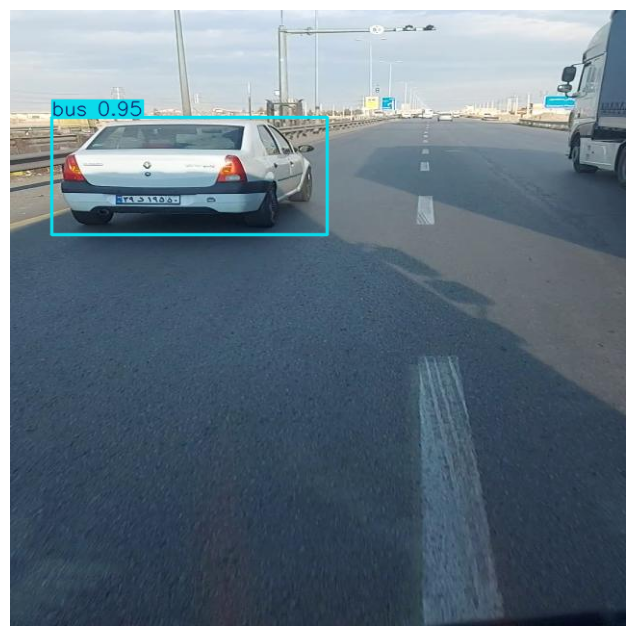

In [62]:
import matplotlib.pyplot as plt
import cv2

# Run prediction
results = model.predict(img_path, save=True, conf=0.25, verbose=False)

# Count vehicles
num_vehicles = len(results[0].boxes)
noise_level = rate_noise(num_vehicles)
print(f"{os.path.basename(img_path)}: {num_vehicles} vehicles → Noise level: {noise_level}")

# --- Display image with detections ---
# results[0].plot() returns a numpy array with bounding boxes drawn
annotated_img = results[0].plot()

# Convert BGR (OpenCV) to RGB (matplotlib)
annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(annotated_img)
plt.axis("off")
plt.show()


In [61]:
img_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/images/frame_9486_jpg.rf.2280c498ddc7234aff225ca73be23450.jpg"

results = model.predict(img_path, save=True, conf=0.25, verbose=False)

num_vehicles = len(results[0].boxes)
noise_level = rate_noise(num_vehicles)
print(f"{os.path.basename(img_path)}: {num_vehicles} vehicles → Noise level: {noise_level}")


Results saved to /content/yolov5/runs/detect/predict
frame_9486_jpg.rf.2280c498ddc7234aff225ca73be23450.jpg: 1 vehicles → Noise level: Low


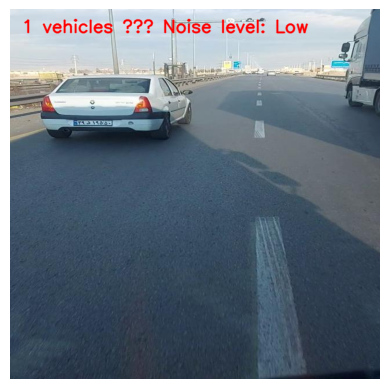

Saved result to: /content/drive/MyDrive/VehicleNoiseProject/vehicle_counts_with_noise.csv


In [64]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# --- Function to classify noise level ---
def rate_noise(num_vehicles):
    if num_vehicles <= 5:
        return "Low"
    elif num_vehicles <= 15:
        return "Medium"
    else:
        return "High"

# --- Path to image ---
img_path = "/content/drive/MyDrive/VehicleNoiseProject/images/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov8/test/images/frame_9486_jpg.rf.2280c498ddc7234aff225ca73be23450.jpg"

# --- Run YOLO prediction ---
results = model.predict(img_path, save=False, conf=0.25, verbose=False)

# Count detected vehicles
num_vehicles = len(results[0].boxes)
noise_level = rate_noise(num_vehicles)

# --- Display image with text only (no bounding boxes) ---
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Put text (vehicles count + noise level) on the image
text = f"{num_vehicles} vehicles → Noise level: {noise_level}"
cv2.putText(img_rgb, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX,
            1, (255, 0, 0), 2, cv2.LINE_AA)

plt.imshow(img_rgb)
plt.axis("off")
plt.show()

# --- Save to CSV ---
save_csv = True
if save_csv:
    out_csv = "/content/drive/MyDrive/VehicleNoiseProject/vehicle_counts_with_noise.csv"
    row = {"image": os.path.basename(img_path), "vehicles": num_vehicles, "noise_level": noise_level}
    new_df = pd.DataFrame([row])

    if os.path.exists(out_csv):
        df = pd.read_csv(out_csv)
        df = pd.concat([df, new_df], ignore_index=True)
    else:
        df = new_df

    df.to_csv(out_csv, index=False)
    print("Saved result to:", out_csv)


Saving road-5409998_640.jpg to road-5409998_640.jpg
/tmp/temp_image.jpg: 1 vehicles → Noise level: Low


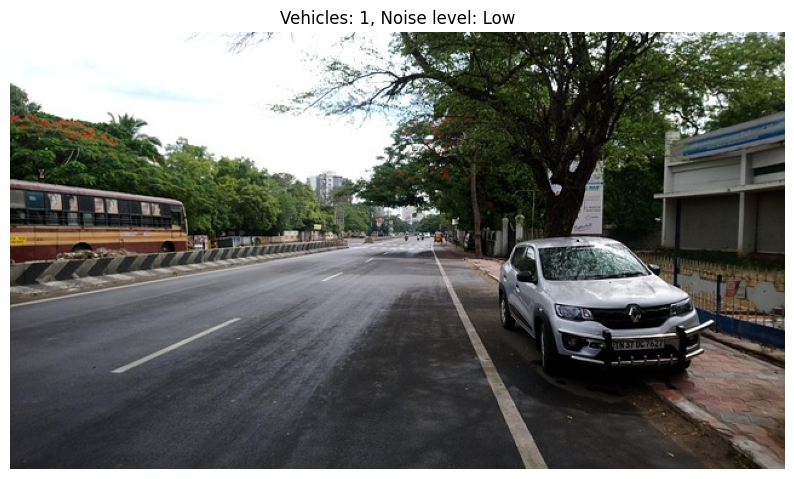

In [72]:
# 1️⃣ Upload your external image
from google.colab import files
uploaded = files.upload()  # select your image
img_path = list(uploaded.keys())[0]  # gets the uploaded file path

# 2️⃣ Import necessary libraries
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image

# 3️⃣ Load your trained YOLO model
model = YOLO("/content/yolov5/VehicleDetection/yolov8_training/weights/best.pt")  # adjust path if needed

# 4️⃣ Define noise rating function
def rate_noise(num_vehicles):
    if num_vehicles <= 2:
        return "Low"
    elif num_vehicles <= 5:
        return "Medium"
    else:
        return "High"

# 5️⃣ Preprocess the uploaded image
img = Image.open(img_path).convert("RGB")  # ensure RGB
img.thumbnail((1024, 1024))  # resize to max 1024x1024 while keeping aspect ratio
temp_path = "/tmp/temp_image.jpg"
img.save(temp_path)
img_path = temp_path

# 6️⃣ Run prediction with lower confidence threshold
results = model.predict(img_path, conf=0.1, verbose=False)

# 7️⃣ Count vehicles and determine noise level
num_vehicles = len(results[0].boxes)
noise_level = rate_noise(num_vehicles)
print(f"{img_path}: {num_vehicles} vehicles → Noise level: {noise_level}")

# 8️⃣ Display the image with text overlay only (no bounding boxes)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"Vehicles: {num_vehicles}, Noise level: {noise_level}")
plt.show()


In [67]:
results = model.predict(img_path, conf=0.1, verbose=False)  # lower threshold
num_vehicles = len(results[0].boxes)
print("Detected vehicles:", num_vehicles)


Detected vehicles: 1


In [69]:
boxes = results[0].boxes.xyxy
scores = results[0].boxes.conf
print("Boxes:", boxes)
print("Scores:", scores)


Boxes: tensor([], device='cuda:0', size=(0, 4))
Scores: tensor([], device='cuda:0')


Saving road-5409998_640.jpg to road-5409998_640 (1).jpg
Image exists: True
road-5409998_640 (1).jpg: 1 vehicles → Noise level: Low


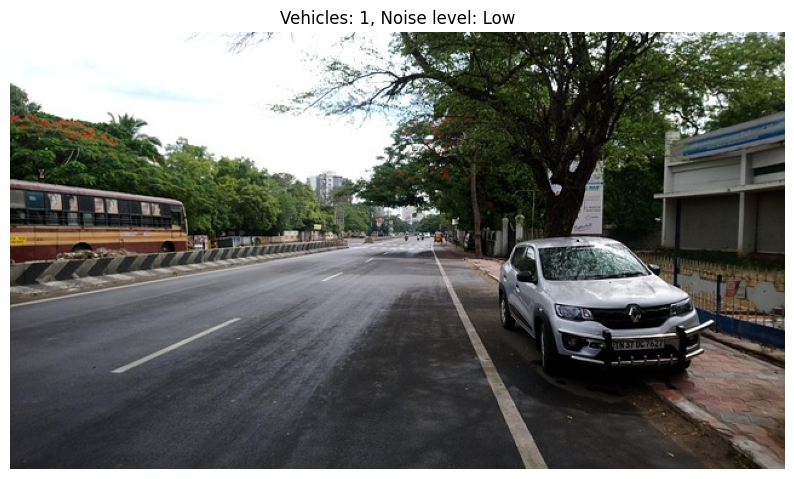

In [75]:
# 1️⃣ Upload your external image
from google.colab import files
uploaded = files.upload()  # select your image

# Get the uploaded file path
import os
img_path = list(uploaded.keys())[0]

# Confirm the image exists
print("Image exists:", os.path.exists(img_path))

# 2️⃣ Import necessary libraries
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image

# 3️⃣ Load your trained model (adjust path to your .pt file)
model = YOLO("/content/yolov5/VehicleDetection/yolov8_training/weights/best.pt")

# 4️⃣ Define your noise rating function
def rate_noise(num_vehicles):
    if num_vehicles <= 2:
        return "Low"
    elif num_vehicles <= 5:
        return "Medium"
    else:
        return "High"

# 5️⃣ Run prediction
results = model.predict(img_path, verbose=False)

# 6️⃣ Count vehicles and determine noise level
num_vehicles = len(results[0].boxes)
noise_level = rate_noise(num_vehicles)
print(f"{img_path}: {num_vehicles} vehicles → Noise level: {noise_level}")

# 7️⃣ Display the image with noise level text (no bounding boxes)
img = Image.open(img_path)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"Vehicles: {num_vehicles}, Noise level: {noise_level}")
plt.show()


In [76]:
from ultralytics import YOLO

# Load your trained model (if not already loaded)
model = YOLO("/content/yolov5/VehicleDetection/yolov8_training/weights/best.pt")

# Save the model with a custom name
save_path = "/content/VehicleNoiseModel.pt"
model.save(save_path)

print("Model saved at:", save_path)


Model saved at: /content/VehicleNoiseModel.pt


In [77]:
!cp /content/VehicleNoiseModel.pt /content/drive/MyDrive/
